In [130]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [131]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [132]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [133]:
import matplotlib.pyplot as plt
#plt.style.use('seaborn-whitegrid')
import netCDF4 as nc
import numpy as np
import scipy as sp
import datetime as dt
import netCDF4 as nc
import pickle
import cmocean as cm
import glob
import sys
sys.path.append('/data/tjarniko/MEOPAR/analysis_tereza/notebooks/PI_CARBON_PAPER/MAIN_ANALYSIS/pyscripts/bylayer_extract/')
import importlib
import extract_bylayer_mean as ebm
import extract_bylayer_MB as eMB
%matplotlib inline

plt.rcParams.update({'font.size': 13,
                     'xtick.labelsize' : 13,
                     'ytick.labelsize' : 13})

## means, massbalances extracted by ebm, eMB. 

usage case below:

    # importlib.reload(ebm)
    # pkldir = '/data/tjarniko/MEOPAR/analysis_tereza/notebooks/PI_CARBON_PAPER/MAIN_ANALYSIS/pkls/'
    # start = '2015-01-01' #start of timeperiod
    # end = '2015-12-31' #end of timeperiod (typically a year)
    # inletmask = False #are we masking out Toba/Bute/Jervis?
    # ftype = 'carp' #type of model result .nc 
    # sdir = '/MAIN/BR_3rd_2015' #where under directory tree do we find ncs 
    # varname = 'dissolved_inorganic_carbon' #name of variable
    # fname = pkldir + 'BR3_DIC_means_inletsIN' #name of resulting pkl 
    # ebm.extractor(start, end, ftype, sdir, varname, fname,  inletmask)

    # importlib.reload(eMB)
    # fname = pkldir + 'BR3_DIC_MB_inletsIN' #name of resulting pkl 
    # eMB.extractor(start, end, ftype, sdir, varname, fname,  inletmask)
    
ebm, eMB done for: PI4, BR3 for diat, nit, DIC, sal

In [134]:
## 

BR3_means_nit = pickle.load(open('../pkls/BR3_nit_means_inletsIN.pkl', 'rb'))
BR3_means_diat = pickle.load(open('../pkls/BR3_diat_means_inletsIN.pkl', 'rb'))
BR3_means_sal = pickle.load(open('../pkls/BR3_sal_means_inletsIN.pkl', 'rb'))
BR3_means_DIC = pickle.load(open('../pkls/BR3_DIC_means_inletsIN.pkl', 'rb'))

## 
PI4_means_nit = pickle.load(open('../pkls/PI4_nit_means_inletsIN.pkl', 'rb'))
PI4_means_diat = pickle.load(open('../pkls/PI4_diat_means_inletsIN.pkl', 'rb'))
PI4_means_sal = pickle.load(open('../pkls/PI4_sal_means_inletsIN.pkl', 'rb'))
PI4_means_DIC = pickle.load(open('../pkls/PI4_DIC_means_inletsIN.pkl', 'rb'))

In [135]:
## 
BR3_MB_DIC = pickle.load(open('../pkls/BR3_DIC_MB_inletsIN.pkl', 'rb'))
PI4_MB_DIC = pickle.load(open('../pkls/PI4_DIC_MB_inletsIN.pkl', 'rb'))
#mmol to mols
BR3_MB_DIC = BR3_MB_DIC/1000
PI4_MB_DIC = PI4_MB_DIC/1000

BR3_MB = nc.Dataset('../pkls/MASSBAL_BR3.nc')
PI4_MB = nc.Dataset('../pkls/MASSBAL_PI4.nc')

BR3_JS_trans = BR3_MB['model_output']['stor_trans_BR_JS']
BR3_JDF_trans = BR3_MB['model_output']['stor_trans_BR']
BR3_AS_trans = BR3_MB['model_output']['stor_flx_BR']

PI4_JS_trans = PI4_MB['model_output']['stor_trans_PI_JS']
PI4_JDF_trans = PI4_MB['model_output']['stor_trans_PI']
PI4_AS_trans = PI4_MB['model_output']['stor_flx_PI']

BR3_MB_DIC2 = BR3_MB['model_output']['stor_mol_BR'][:]
PI4_MB_DIC2 = PI4_MB['model_output']['stor_mol_PI'][:]

In [136]:
#plot metrics

def plot_means_and_diff(BR_var, PI_var):
    mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
    depth = mesh['e3t_0'][0,:,250,250]

    lw = 2
    fs = 15
    tcm = cm.cm.deep
    fact = 0.5

    fig = plt.figure(figsize=(19*fact,15*fact))
    days_in = np.arange(0,365*1,1)

    #BR
    ax = fig.add_subplot(3,1,1)
    plt.axvline(x=365,color='r')
    plt.axvline(x=365*2,color='r')
    for i in range(0,40):
        zdepth = np.sum(depth[0:i])
        if i%5 !=0: 
            ax.plot(days_in,BR_var[i,:],color = tcm(1.*i/40), linewidth = lw)
        if i%5 == 0:
                ax.plot(days_in,BR_var[i,:],color = tcm(1.*i/40),\
                        label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
    plt.xlim([0,365*1])
    #plt.ylim([ymin,ymax])
    ax.set_xticklabels([])
    ax.set_ylabel('var concentration', fontsize = fs)
    ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)
    plt.title('BR Run: Mean var concentration by depth', fontsize = fs )

    #PI
    ax = fig.add_subplot(3,1,2)
    for i in range(0,40):
        zdepth = np.sum(depth[0:i])
        ax.plot(days_in,PI_var[i,:],color = tcm(1.*i/40), linewidth = lw)

    plt.xlim([0,365*1])

    ax.set_ylabel('var concentration', fontsize = fs)
    plt.title('PI4 Run: Mean var concentration by depth', fontsize = fs )
    plt.xlabel('day of run', fontsize = fs)


    ax = fig.add_subplot(3,1,3)
    for i in range(0,40):
        zdepth = np.sum(depth[0:i])
        ax.plot(days_in,BR_var[i,:] - PI_var[i,:],color = tcm(1.*i/40), linewidth = lw)

    plt.xlim([0,365*1])
    #plt.ylim([ymin,ymax])
    #ax.set_xticklabels([])
    ax.set_ylabel('var concentration', fontsize = fs)
    plt.title('Difference - BR3-PI4 run', fontsize = fs )
    plt.xlabel('day of run', fontsize = fs)
    plt.tight_layout()

# VARIABLE: DIC (by-layer-means)

## by-layer means - DIC

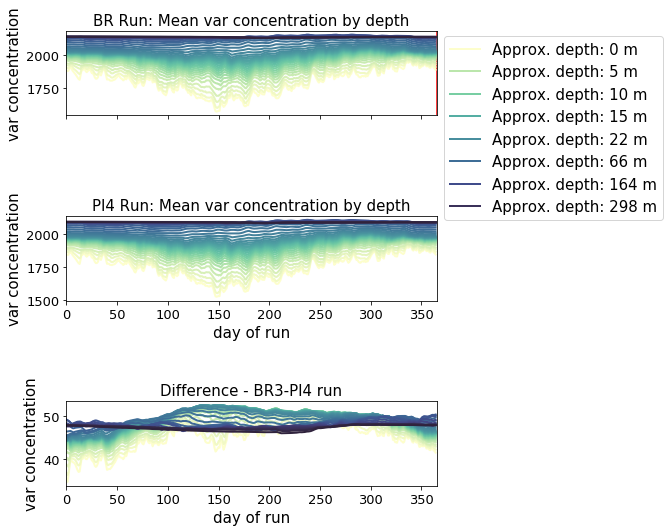

In [137]:
BR_var = BR3_means_DIC
PI_var = PI4_means_DIC

plot_means_and_diff(BR_var, PI_var)


## A more detailed look at BR3-PI4

No handles with labels found to put in legend.
No handles with labels found to put in legend.


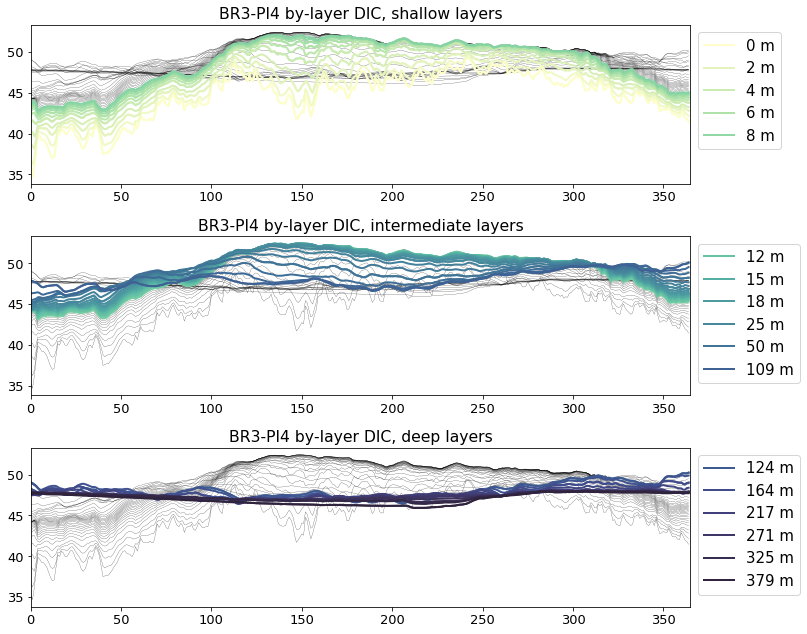

In [138]:
BR_var = BR3_means_DIC
PI_var = PI4_means_DIC
fact = 0.6

fig = plt.figure(figsize=(19*fact,15*fact))
days_in = np.arange(0,365*1,1)
mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
depth = mesh['e3t_0'][0,:,250,250]

ax = fig.add_subplot(3,1,1)

tcm = cm.cm.deep
for i in range(0,40):
    zdepth = np.sum(depth[0:i])
    ax.plot(days_in,BR_var[i,:] - PI_var[i,:],color = 'k', linewidth = 0.2)

for i in range(0,10):    
    zdepth = np.sum(depth[0:i])
    ax.plot(days_in,BR_var[i,:] - PI_var[i,:],color = tcm(1.*i/40), linewidth = 2)
    if i%2 == 0:
        ax.plot(days_in,BR_var[i,:] - PI_var[i,:],color = tcm(1.*i/40), linewidth = 2, label = str(int(zdepth)) + ' m')
    ax.legend(bbox_to_anchor = [1,1], fontsize = 15)
ax.set_xlim([0,365])
plt.title('BR3-PI4 by-layer DIC, shallow layers')

ax = fig.add_subplot(3,1,2)

tcm = cm.cm.deep
for i in range(0,40):
    zdepth = np.sum(depth[0:i])
    ax.plot(days_in,BR_var[i,:] - PI_var[i,:],color = 'k', linewidth = 0.2)

for i in range(10,28):    
    zdepth = np.sum(depth[0:i])
    ax.plot(days_in,BR_var[i,:] - PI_var[i,:],color = tcm(1.*i/40), linewidth = 2)
    if i%3 == 0:
        ax.plot(days_in,BR_var[i,:] - PI_var[i,:],color = tcm(1.*i/40), linewidth = 2, label = str(int(zdepth)) + ' m')
    ax.legend(bbox_to_anchor = [1,1], fontsize = 15)
ax.set_xlim([0,365])
plt.title('BR3-PI4 by-layer DIC, intermediate layers')

ax = fig.add_subplot(3,1,3)

tcm = cm.cm.deep
for i in range(0,40):
    zdepth = np.sum(depth[0:i])
    ax.plot(days_in,BR_var[i,:] - PI_var[i,:],color = 'k', linewidth = 0.2)

for i in range(28,40):    
    zdepth = np.sum(depth[0:i])
    ax.plot(days_in,BR_var[i,:] - PI_var[i,:],color = tcm(1.*i/40), linewidth = 2)
    if i%2 == 0:
        ax.plot(days_in,BR_var[i,:] - PI_var[i,:],color = tcm(1.*i/40), linewidth = 2, label = str(int(zdepth)) + ' m')
    ax.legend(bbox_to_anchor = [1,1], fontsize = 15)
ax.set_xlim([0,365])
plt.title('BR3-PI4 by-layer DIC, deep layers')

plt.tight_layout()

### BY-layer difference - salinity, nitrate, diat - these should be zero, and it's pleasantly gratifying that they are

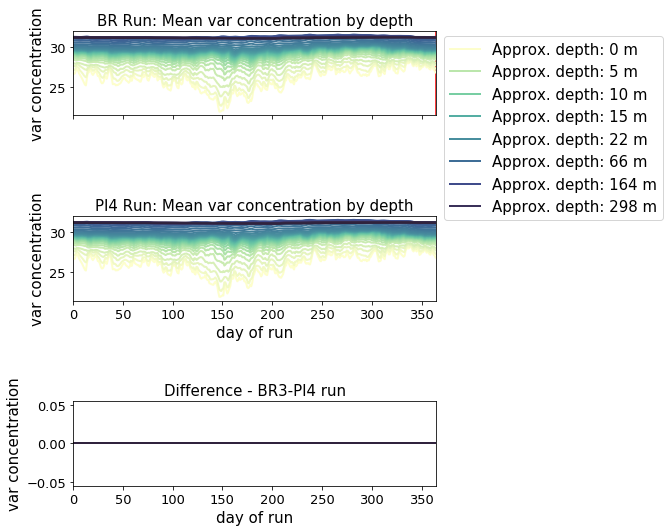

In [139]:
BR_var = BR3_means_sal
PI_var = PI4_means_sal

plot_means_and_diff(BR_var, PI_var)


## by-layer means -diatoms

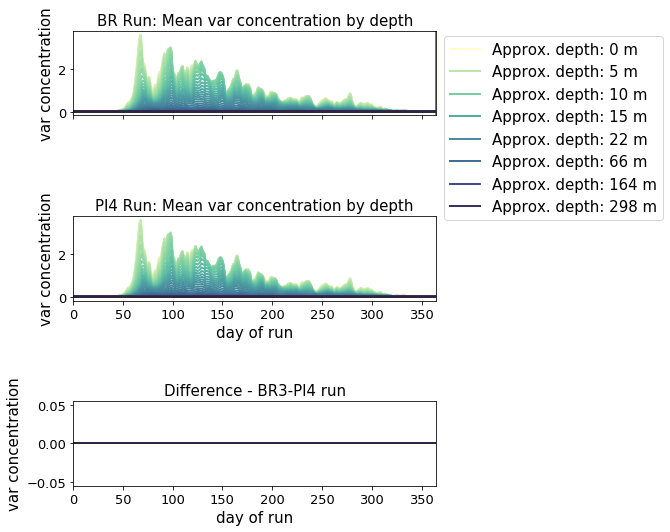

In [140]:
BR_var = BR3_means_diat
PI_var = PI4_means_diat

plot_means_and_diff(BR_var, PI_var)


### by-layer means - nitrate

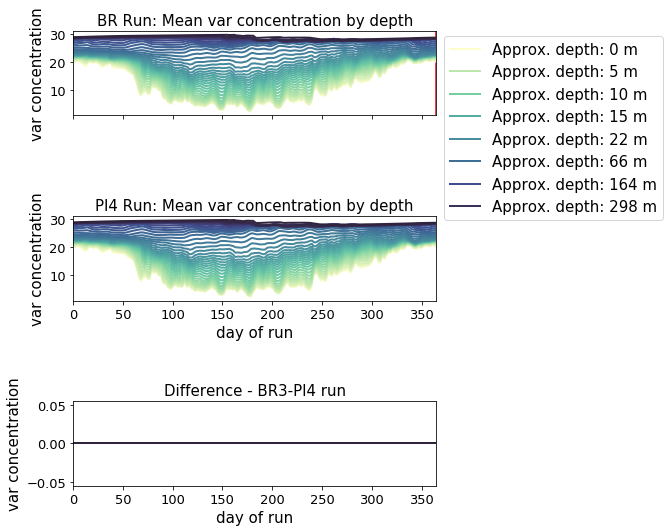

In [141]:
BR_var = BR3_means_nit
PI_var = PI4_means_nit

plot_means_and_diff(BR_var, PI_var)


## Transports and air-sea flux

## MB_DIC2 is the stor_mol way of calculating mass balance. we see it's the same, though less accurate, as the by-layer way 

In [144]:


print(np.shape(BR3_MB_DIC2))
print(np.shape(BR3_MB_DIC))
print(BR3_MB_DIC2[0])
print(np.sum(BR3_MB_DIC[:,0]))

(365,)
(40, 365)
4744206000000.0
4744206153018.273


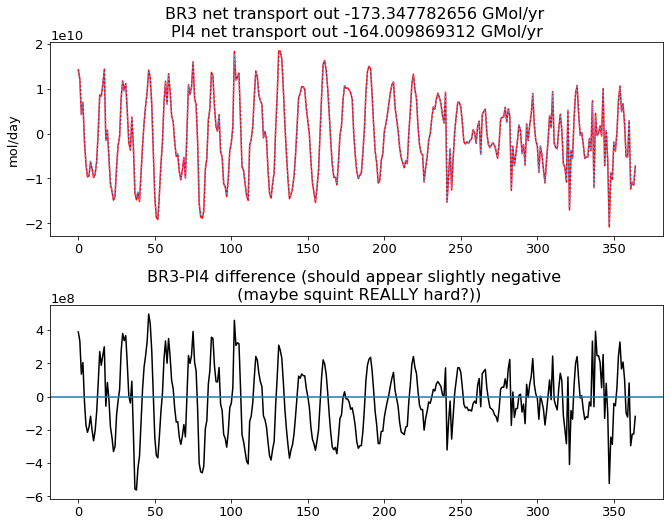

In [160]:
fact = 0.5

fig = plt.figure(figsize=(19*fact,15*fact))
days_in = np.arange(0,365*1,1)

#BR
ax = fig.add_subplot(2,1,1)
ax.plot(days_in,BR3_JDF_trans,'r-')
ax.plot(days_in,PI4_JDF_trans,color = 'cornflowerblue', linestyle = ':')

BR3_transp_JDF = np.sum(BR3_JDF_trans)/1e9
PI4_transp_JDF = np.sum(PI4_JDF_trans)/1e9
ax.set_title('BR3 net transport out '+ str(BR3_transp_JDF) + ' GMol/yr \n' +\
            'PI4 net transport out '+ str(PI4_transp_JDF) + ' GMol/yr', fontsize = 16)

ax.set_ylabel('mol/day')

ax = fig.add_subplot(2,1,2)
ax.plot(days_in,BR3_JDF_trans[:]-PI4_JDF_trans[:],'k-')
ax.set_title('BR3-PI4 difference (should appear slightly negative \n (maybe squint REALLY hard?))', fontsize = 16)
ax.axhline(y=0)

plt.tight_layout()

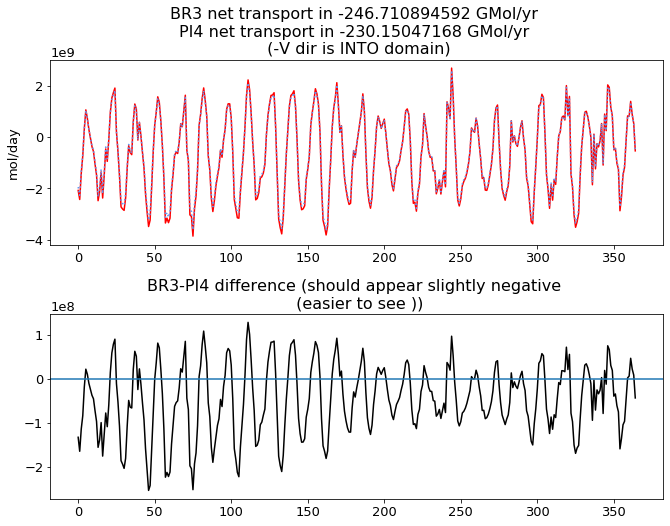

In [146]:
fact = 0.5

fig = plt.figure(figsize=(19*fact,15*fact))
days_in = np.arange(0,365*1,1)

#BR
ax = fig.add_subplot(2,1,1)
ax.plot(days_in,BR3_JS_trans,'r-')
ax.plot(days_in,PI4_JS_trans,color = 'cornflowerblue', linestyle = ':')

BR3_transp_JS = np.sum(BR3_JS_trans)/1e9
PI4_transp_JS = np.sum(PI4_JS_trans)/1e9
ax.set_title('BR3 net transport in '+ str(BR3_transp_JS) + ' GMol/yr \n' +\
            'PI4 net transport in '+ str(PI4_transp_JS) + ' GMol/yr \n (-V dir is INTO domain)' , fontsize = 16)

ax.set_ylabel('mol/day')

ax = fig.add_subplot(2,1,2)
ax.plot(days_in,BR3_JS_trans[:]-PI4_JS_trans[:],'k-')
ax.set_title('BR3-PI4 difference (should appear slightly negative \n (easier to see ))', fontsize = 16)
ax.axhline(y=0)

plt.tight_layout()

## code to get by-day fluxes for BR3, PI2-PI4

In [147]:
# import arrow 
# start = '2015-01-01'
# end = '2015-12-31'


# sdir = '/data/tjarniko/results/BASERUN_EXP/MAIN/BR_3rd_2015/ncs/'
# sdir3 = '/data/tjarniko/results/BASERUN_EXP/PILA4/PI4/ncs/'
# sdir3rr = '/data/tjarniko/results/BASERUN_EXP/PILA3_rerun/PI3/ncs/'
# sdir2 = '/data/tjarniko/results/BASERUN_EXP/NOT_MAIN_ANALYSIS/PI_2nd_2015/ncs/'



# def make_nclen(start,end,ftype, sdir):
#     base_ar = []
#     sens_ar = []
#     start_run = arrow.get(start)
#     end_run = arrow.get(end)
#     arrow_array = []
#     for r in arrow.Arrow.span_range('day', start_run, end_run):
#         arrow_array.append(r)

#     dayslen = len(arrow_array)
#     for i in range(0,dayslen):
#         tdate = arrow_array[i][0]
#         ddmmmyy = tdate.format('DDMMMYY').lower()
#         ymd = tdate.format('YYYYMMDD')
#         nc_sens = sdir + '/SKOG_1d_*'+ ftype +'*' + ymd + '-' + ymd + '.nc'
#         tnc_sens = glob.glob(nc_sens)
#         sens_ar.append(tnc_sens[0])
#     return sens_ar

# BR3_ar = make_nclen(start,end,'carp', sdir)
# print('walrus')
# PI4_ar = make_nclen(start,end,'carp', sdir3)
# print('walrus')
#PI3_ar = make_nclen(start,end,'carp', sdir3rr)
#PI2_ar = make_nclen(start,end,'carp', sdir2)
#print('walrus')

#BR3_flx = np.zeros([365,898,398])
# # PI4_flx = np.zeros([365,898,398])
# # PI2_flx = np.zeros([365,898,398])
# for i in range(0,365):
#     if i%50 == 0:
#         print(i)
#     BR3_nc = nc.Dataset(BR3_ar[i])
#     BR3_flx[i,:,:] = BR3_nc['co2_flux_mmol_m2_s'][0,:,:]
# # #     PI4_nc = nc.Dataset(PI4_ar[i])
# # #     PI4_flx[i,:,:] = PI4_nc['co2_flux_mmol_m2_s'][0,:,:]

# # for i in range(0,365):
# #     if i%50 == 0:
# #         print(i)

# #     PI2_nc = nc.Dataset(PI2_ar[i])
# #     PI2_flx[i,:,:] = PI2_nc['co2_flux_mmol_m2_s'][0,:,:]

# BR3_flx[BR3_flx>1e10] = 0
# # # PI4_flx[PI4_flx>1e10] = 0
# # PI2_flx[PI2_flx>1e10] = 0
# # print(np.nansum(PI2_flx))
# pickle.dump(BR3_flx, open("../pkls/flux/BR3_flx.pkl", 'wb'))
# # #pickle.dump(PI4_flx, open("../pkls/flux/PI4_flx.pkl", 'wb'))   
# # pickle.dump(PI2_flx, open("../pkls/flux/PI2_flx.pkl", 'wb'))


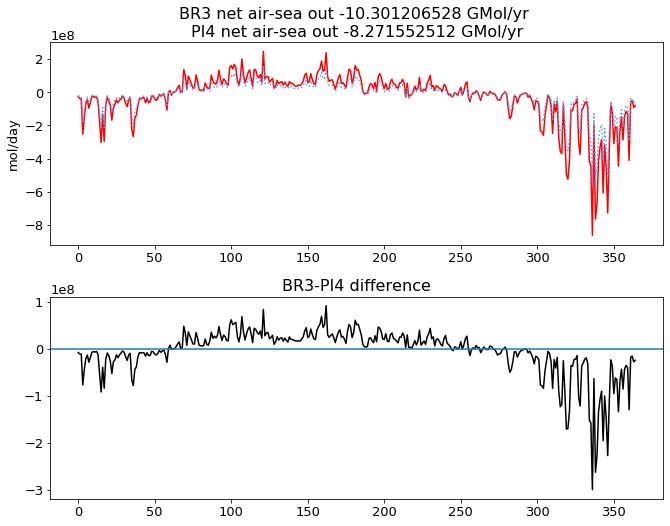

In [148]:
fact = 0.5

fig = plt.figure(figsize=(19*fact,15*fact))
days_in = np.arange(0,365*1,1)

#BR
ax = fig.add_subplot(2,1,1)
ax.plot(days_in,BR3_AS_trans,'r-')
ax.plot(days_in,PI4_AS_trans,color = 'cornflowerblue', linestyle = ':')

BR3_transp_out = np.sum(BR3_AS_trans)/1e9
PI4_transp_out = np.sum(PI4_AS_trans)/1e9
ax.set_title('BR3 net air-sea out '+ str(BR3_transp_out) + ' GMol/yr \n' +\
            'PI4 net air-sea out '+ str(PI4_transp_out) + ' GMol/yr', fontsize = 16)

ax.set_ylabel('mol/day')

ax = fig.add_subplot(2,1,2)
ax.plot(days_in,BR3_AS_trans[:]-PI4_AS_trans[:],'k-')
ax.set_title('BR3-PI4 difference', fontsize = 16)
ax.axhline(y=0)

plt.tight_layout()

## This is unexpected - BR3 is outgassing more than PI4...
## We now realize that PI4 outgasses less the more it's spun up:

In [149]:
BR3_flx = pickle.load(open('../pkls/flux/BR3_flx.pkl','rb'))
PI4_flx = pickle.load(open('../pkls/flux/PI4_flx.pkl','rb'))
PI3_flx = pickle.load(open('../pkls/flux/PI3rr_flx.pkl','rb'))
PI2_flx = pickle.load(open('../pkls/flux/PI2_flx.pkl','rb'))

In [150]:
BR3_mean = np.nanmean(BR3_flx)
PI4_mean = np.nanmean(PI4_flx)
PI3_mean = np.nanmean(PI3_flx)
PI2_mean = np.nanmean(PI2_flx)

Text(0, 0.5, 'mmol/m2/s')

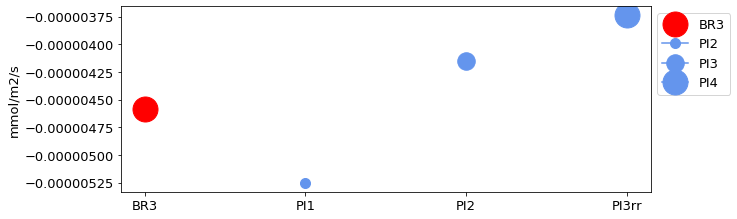

In [151]:
fig = plt.figure(figsize=(19*fact,15*fact))
days_in = np.arange(0,365*1,1)

#BR
ax = fig.add_subplot(2,1,1)
ax.plot(0,BR3_mean,'r.',markersize = 50, label = 'BR3')
ax.plot(1,PI2_mean, marker = '.', color = 'cornflowerblue',markersize = 20, label = 'PI2')
ax.plot(2,PI3_mean, marker = '.', color = 'cornflowerblue',markersize = 35, label = 'PI3')
ax.plot(3,PI4_mean, marker = '.', color = 'cornflowerblue',markersize = 50, label = 'PI4')
ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(['BR3','PI1','PI2','PI3rr'])
ax.legend(bbox_to_anchor = [1, 1])

ax.set_ylabel('mmol/m2/s')

## BR3: AS flux (neg) + JDF flux (neg) - JS flux (neg, repr. positive quality) (in GMOL)

In [152]:
(np.sum(BR3_AS_trans) + np.sum(BR3_JDF_trans) - np.sum(BR3_JS_trans))/1e9

63.061901312

## PI4: AS flux (neg) + JDF flux (neg) - JS flux (neg, repr. positive quality) (in GMOL)

In [153]:
(np.sum(PI4_AS_trans) + np.sum(PI4_JDF_trans) - np.sum(PI4_JS_trans))/1e9

57.869041664

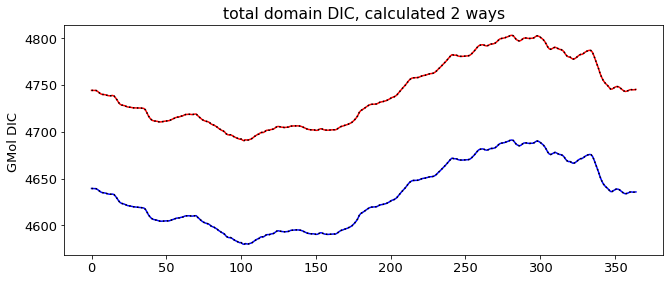

In [164]:


fact = 0.5

fig = plt.figure(figsize=(19*fact,15*fact))
days_in = np.arange(0,365*1,1)

#BR
ax = fig.add_subplot(2,1,1)
ax.plot(days_in,np.nansum(BR3_MB_DIC/1e9, axis = 0),'r-')
ax.plot(days_in,(BR3_MB_DIC2/1e9),'k:')

ax.plot(days_in,np.nansum(PI4_MB_DIC/1e9, axis = 0),'b-')
ax.plot(days_in,(PI4_MB_DIC2/1e9),'k:')
ax.set_ylabel('GMol DIC ')
plt.title('total domain DIC, calculated 2 ways')

plt.tight_layout()

In [168]:
print('respective EOY differences calculated 2 ways')
PI4_DIC_Gmol = np.nansum(PI4_MB_DIC/1e9, axis = 0)
print(np.shape(PI4_DIC_Gmol))
PI4_eoy_diff = (PI4_MB_DIC2[364]-PI4_MB_DIC2[0])/1e9
print(PI4_eoy_diff)
PI4_eoy_diff2 = PI4_DIC_Gmol[364]-PI4_DIC_Gmol[0]
print(PI4_eoy_diff2)

BR3_DIC_Gmol = np.nansum(BR3_MB_DIC/1e9, axis = 0)
print(np.shape(BR3_DIC_Gmol))
BR3_eoy_diff = (BR3_MB_DIC2[364]-BR3_MB_DIC2[0])/1e9
print(BR3_eoy_diff)
BR3_eoy_diff2 = BR3_DIC_Gmol[364]-BR3_DIC_Gmol[0]
print(BR3_eoy_diff2)


(365,)
-3.681026048
-3.680659910808572
(365,)
0.9961472
0.9960830631789577


<Figure size 432x288 with 0 Axes>

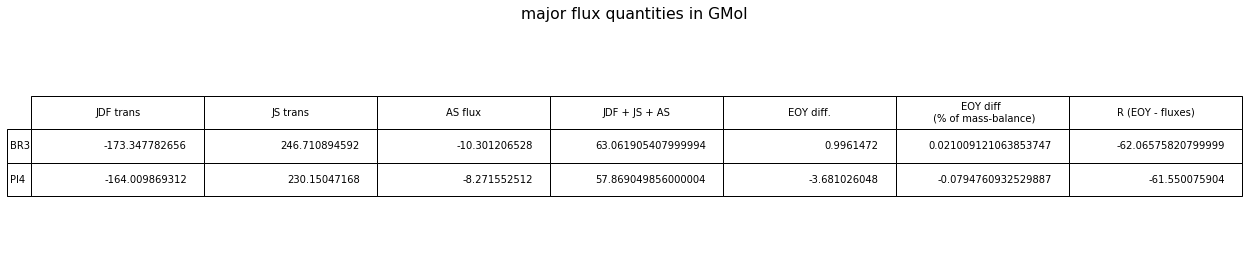

In [171]:
fig = plt.figure()
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
fs = 10
sc1 = 2.5
sc2 = 2.5

col_labels = ['JDF trans', 'JS trans', 'AS flux',  \
             'JDF + JS + AS',\
              'EOY diff.',\
              'EOY diff \n (% of mass-balance)' , 'R (EOY - fluxes)']
row_labels = ['BR3', 'PI4']

BR3_transtot_GMol = (np.sum(BR3_JDF_trans)/1e9 - np.sum(BR3_JS_trans)/1e9 + np.sum(BR3_AS_trans)/1e9)
PI4_transtot_GMol = (np.sum(PI4_JDF_trans)/1e9 - np.sum(PI4_JS_trans)/1e9 + np.sum(PI4_AS_trans)/1e9)

table_vals = [[np.sum(BR3_JDF_trans)/1e9, 
               -np.sum(BR3_JS_trans)/1e9, 
               np.sum(BR3_AS_trans)/1e9, 
               BR3_transtot_GMol,
               BR3_eoy_diff, (BR3_eoy_diff/np.nanmean(BR3_DIC_Gmol))*100, BR3_eoy_diff - BR3_transtot_GMol ],\
              [np.sum(PI4_JDF_trans)/1e9, 
               -np.sum(PI4_JS_trans)/1e9, 
               np.sum(PI4_AS_trans)/1e9, 
               (np.sum(PI4_JDF_trans)/1e9 - np.sum(PI4_JS_trans)/1e9 + np.sum(PI4_AS_trans)/1e9),
               PI4_eoy_diff, (PI4_eoy_diff/np.nanmean(PI4_DIC_Gmol))*100, PI4_eoy_diff - PI4_transtot_GMol ]]



# Draw table
the_table = plt.table(cellText=table_vals,
                      colWidths=[0.1] * 7,
                      rowLabels=row_labels,
                      colLabels=col_labels,
                      loc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(fs)
the_table.scale(sc1, sc2)

# Removing ticks and spines enables you to get the figure only with table
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
for pos in ['right','top','bottom','left']:
    plt.gca().spines[pos].set_visible(False)
    
plt.title('major flux quantities in GMol ')


plt.tight_layout()

<Figure size 432x288 with 0 Axes>

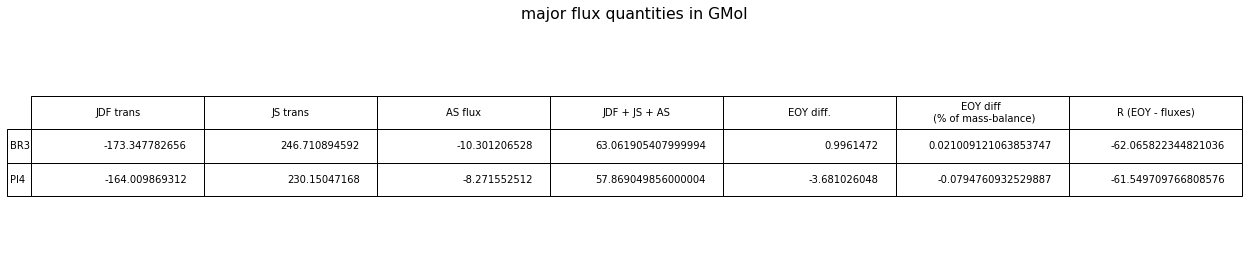

In [172]:
fig = plt.figure()
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
fs = 10
sc1 = 2.5
sc2 = 2.5

col_labels = ['JDF trans', 'JS trans', 'AS flux',  \
             'JDF + JS + AS',\
              'EOY diff.',\
              'EOY diff \n (% of mass-balance)' , 'R (EOY - fluxes)']
row_labels = ['BR3', 'PI4']

BR3_transtot_GMol = (np.sum(BR3_JDF_trans)/1e9 - np.sum(BR3_JS_trans)/1e9 + np.sum(BR3_AS_trans)/1e9)
PI4_transtot_GMol = (np.sum(PI4_JDF_trans)/1e9 - np.sum(PI4_JS_trans)/1e9 + np.sum(PI4_AS_trans)/1e9)

table_vals = [[np.sum(BR3_JDF_trans)/1e9, 
               -np.sum(BR3_JS_trans)/1e9, 
               np.sum(BR3_AS_trans)/1e9, 
               BR3_transtot_GMol,
               BR3_eoy_diff, (BR3_eoy_diff/np.nanmean(BR3_DIC_Gmol))*100, BR3_eoy_diff2 - BR3_transtot_GMol ],\
              [np.sum(PI4_JDF_trans)/1e9, 
               -np.sum(PI4_JS_trans)/1e9, 
               np.sum(PI4_AS_trans)/1e9, 
               (np.sum(PI4_JDF_trans)/1e9 - np.sum(PI4_JS_trans)/1e9 + np.sum(PI4_AS_trans)/1e9),
               PI4_eoy_diff, (PI4_eoy_diff/np.nanmean(PI4_DIC_Gmol))*100, PI4_eoy_diff2 - PI4_transtot_GMol ]]



# Draw table
the_table = plt.table(cellText=table_vals,
                      colWidths=[0.1] * 7,
                      rowLabels=row_labels,
                      colLabels=col_labels,
                      loc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(fs)
the_table.scale(sc1, sc2)

# Removing ticks and spines enables you to get the figure only with table
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
for pos in ['right','top','bottom','left']:
    plt.gca().spines[pos].set_visible(False)
    
plt.title('major flux quantities in GMol ')


plt.tight_layout()

## I got 99 problems and some of them seem to be related to rounding.

In [192]:
w = nc.Dataset('/data/tjarniko/results/BASERUN_EXP/MAIN/BR_3rd_2015/ncs/SKOG_1d_20151127_20151231_dian_V_20151231-20151231.nc')
print('fluxes at the JS, point 878, 60')
print(w['DIC_VT'][0,:,878,60])

w = nc.Dataset('/data/tjarniko/results/BASERUN_EXP/MAIN/BR_3rd_2015/ncs/SKOG_1d_20151127_20151231_dian_U_20151231-20151231.nc')
print('fluxes at the JdF, point - this is mmols/s')
print(w['DIC_UT'][0,:,378,20])

fluxes at the JS, point 878, 60
[  114176.86    110197.08    105101.305    98895.2      93473.484
    89989.445    88150.06     87234.64     87029.836    87227.11
    87852.18     88981.5      90687.9      93183.03     96823.836
   102634.94    112366.49    129935.266   162295.23    222684.47
   332598.72    506508.22    768870.7    1009150.2    1154934.4
  1114517.8     924222.8     412380.94   -688818.4   -2252397.8
        0.           0.           0.           0.           0.
        0.           0.           0.           0.           0.   ]
fluxes at the JdF, point
[  -22194.393   -19671.533   -17543.11    -15775.328   -14316.336
   -13108.249   -12347.821   -12285.805   -13008.314   -14200.15
   -15126.896   -16255.221   -17850.213   -19929.318   -22816.428
   -27653.12    -34295.64    -45404.76    -66978.85   -110164.016
  -195432.53   -378521.16   -741749.6   -1065404.2    -380858.1
    75256.09         0.           0.           0.           0.
        0.           0.          

In [197]:
print('the above quantities are for the PI4 run, but it doesnt matter which')
print('January 1st mass balance calculated using a by_layer_approach - mols')
print(np.sum(PI4_MB_DIC[:,0]))
print('January 1st mass balance calculated using a entire-grid approach - also mols')
print(np.sum(PI4_MB_DIC2[0]))
print('January 1st JDF fluxes in and out of system - mols/day')
print(BR3_JDF_trans[0])
print('January 1st Js fluxes in and out of system - mols/day')
print(BR3_JS_trans[0])

the above quantities are for the PI4 run, but it doesnt matter which
January 1st mass balance calculated using a by_layer_approach - mols
4639394904453.416
January 1st mass balance calculated using a entire-grid approach - also mols
4639395000000.0
January 1st JDF fluxes in and out of system - mols/day
14163711000.0
January 1st Js fluxes in and out of system - mols/day
-2077179300.0
